In [1]:
import pickle as pkl
import json
import os
import os.path as osp
import sys
import pandas as pd

In [2]:
valSetList = ['GOD_OpenImage_val', 'GOD_FashionV2_val','GOD_furniture_val','GOD_coco_2014_minival']
def getValFormat(modelName, valset):
    godModelPath = '/media/data/chnxi/GOD/Models/'
    test_scale = 400
    softNMS = False
    evalFolder = 'Test_{}-SoftNMS-{}'.format(test_scale, softNMS)
    modelType = 'retinanet' if 'ret' in modelName else 'generalized_rcnn'
    valFolderFormat = osp.join(godModelPath, modelName, evalFolder, valset, modelType)
    print (valFolderFormat)
    return valFolderFormat   

In [3]:
import matplotlib.pyplot as plt
colors = ['b','r','g','m']

def plotPR(modelName):
    prtTable = {}
    fig, ax = plt.subplots()

    plt.grid(True)
    plt.title(modelName)
    for ix, valset in enumerate(valSetList):
        valFolder = getValFormat(modelName, valset) 
        #osp.join(godModelPath, modelName, evalFolder, valset, modelType)
        #print (valFolder)
        locPkl = osp.join(valFolder, 'localization_pr_curves.pkl')
        d = pkl.load(open(locPkl,'rb'))
        print (d.keys())
        print(d['locAP50'])
        #print (d['loc_thrsh_at_prec'])
        #print (d['loc_thrsh_at_rec'])
        dd = {key:d['loc_thrsh_at_prec'][key][0] for key in d['loc_thrsh_at_prec']}
        #print (dd)
        df  = pd.DataFrame.from_dict(dd, orient='index')
        prtTable[valset] = df
        col = colors[ix]
        ax.plot(d['recallThrs'], d['locPrecisions'][0,:], col+'-', label=valset)
    plt.legend()
    return prtTable

/media/data/chnxi/GOD/Models/Open800k_580/retr50_bs_4-iter_450000-lr_0.01/Test_400-SoftNMS-False/GOD_OpenImage_val/retinanet
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
[0.2680435725116374]
/media/data/chnxi/GOD/Models/Open800k_580/retr50_bs_4-iter_450000-lr_0.01/Test_400-SoftNMS-False/GOD_FashionV2_val/retinanet
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
[0.6246712498865428]
/media/data/chnxi/GOD/Models/Open800k_580/retr50_bs_4-iter_450000-lr_0.01/Test_400-SoftNMS-False/GOD_furniture_val/retinanet
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
[0.5694972052484]
/media/data/chnxi/GOD/Models/Open800k_580/retr50_bs_4-iter_450000-lr_0.01/Test_400-SoftNMS-False/GOD_coco_2014_minival/retinanet
dict

,score,recall
0.90,0.979804,0.0
0.85,0.979804,0.0
0.80,0.979804,0.0
0.75,0.979804,0.0


GOD_FashionV2_val


,score,recall
0.90,0.933461,0.00
0.85,0.480494,0.42
0.80,0.438773,0.51
0.75,0.408460,0.57


GOD_furniture_val


,score,recall
0.90,0.675321,0.13
0.85,0.572443,0.26
0.80,0.505756,0.37
0.75,0.465338,0.44


GOD_coco_2014_minival


,score,recall
0.90,0.895914,0.01
0.85,0.865173,0.02
0.80,0.791398,0.05
0.75,0.637540,0.14


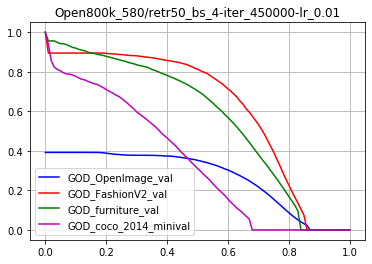

In [6]:
modelName = 'Open800k_580/retr50_bs_4-iter_450000-lr_0.01' #'Open800k/frcnn_8gpuxbs2-iter_1600000-lr_0.02/' #
prtTable = plotPR(modelName)
for key in prtTable:
    print (key)
    display(prtTable[key])

/media/data/chnxi/GOD/Models/Open800k_580/frcnn_8gpuxbs2-iter_1600000-lr_0.02/Test_400-SoftNMS-False/GOD_OpenImage_val/generalized_rcnn
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
[0.24888488165297393]
/media/data/chnxi/GOD/Models/Open800k_580/frcnn_8gpuxbs2-iter_1600000-lr_0.02/Test_400-SoftNMS-False/GOD_FashionV2_val/generalized_rcnn
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
[0.6579037306282028]
/media/data/chnxi/GOD/Models/Open800k_580/frcnn_8gpuxbs2-iter_1600000-lr_0.02/Test_400-SoftNMS-False/GOD_furniture_val/generalized_rcnn
dict_keys(['recallThrs', 'locPrecisions', 'locAPs', 'locAP50', 'locAPDict', 'locAP50Dict', 'loc_thrsh_at_prec', 'loc_thrsh_at_rec', 'classes'])
[0.6084642709109537]
/media/data/chnxi/GOD/Models/Open800k_580/frcnn_8gpuxbs2-iter_1600000-lr_0.02/Test_400-SoftNMS-F

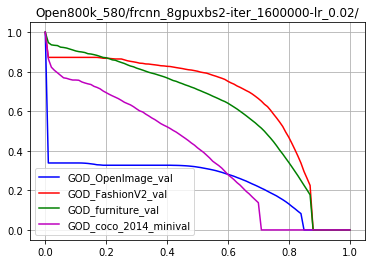

In [64]:
modelName = 'Open800k_580/frcnn_8gpuxbs2-iter_1600000-lr_0.02/' #
prtTable = plotPR(modelName)
print(prtTable['GOD_OpenImage_val'])

In [8]:
df

,score,recall
0.75,0.637540,0.14
0.80,0.791398,0.05
0.85,0.865173,0.02
0.90,0.895914,0.01
